In [1]:
# https://www.kaggle.com/harlfoxem/housesalesprediction/kernels
# Check top 2 kernals based on votes... 
# Record here formulars  for MSE , RMSE , P-value 
#https://www.kaggle.com/nicapotato/in-depth-simple-linear-regression


%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.precision',3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Sklearn modules 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Only Linear Regression is explained in Detail in this Notebook
- no Stratified test train split 
- Analysing the model output is important

### Loading Data and First Look

In [2]:
Curr_Dir = os.path.dirname(os.getcwd())
data_path = os.path.join(Curr_Dir , 'Datasets\kc_housing\kc_house_data.csv')
Data = pd.read_csv(data_path)
print(Data.shape)

(21613, 21)


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
Data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


### Splitting Features (X) and Target(y)
- date column is not used here hence removing it from Features

In [5]:
y = Data['price']
X = Data.drop(columns=['price', 'date'])

print(X.head())
print(y.head())

           id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3      1.000         1180      5650   1.000           0   
1  6414100192         3      2.250         2570      7242   2.000           0   
2  5631500400         2      1.000          770     10000   1.000           0   
3  2487200875         4      3.000         1960      5000   1.000           0   
4  1954400510         3      2.000         1680      8080   1.000           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode    lat     long  sqft

### Splitting Data into Test and Train 

In [6]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
for data in [X_train, X_test, y_train, y_test]:
    print(data.shape)

(15129, 19)
(6484, 19)
(15129,)
(6484,)


### Fitting the Data to LinearRegression

In [8]:
linear = LinearRegression(fit_intercept=True , normalize=True)
linear.fit(X=X_train, y=y_train)
print(linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


### Predicting the X_test

In [9]:
predicted_values = linear.predict(X_test)
print(linear.intercept_)
print(linear.coef_)


5373611.817952959
[-7.42954355e-07 -3.46724928e+04  3.83681778e+04  9.05041349e+01
  1.01788805e-01  3.68902219e+03  5.92533930e+05  5.18776244e+04
  2.37922873e+04  9.70411021e+04  9.35452458e+01  6.31638972e+01
 -2.52939096e+03  2.16157029e+01 -5.85051275e+02  6.01985086e+05
 -2.26506384e+05  2.02109614e+01 -3.29137558e-01]


# Analysing the Model's Accuracy
### Using inbuilt 'score' method , calculates the "coefficient of determination - R^2 or R-Squared"

In [10]:
R_Squared_Value  = linear.score(X_test, y_test)
print("R_Squared_value : {}".format(R_Squared_Value))

R_Squared_value : 0.7063417153456026


### Visualizing the predicted data vs predicted values

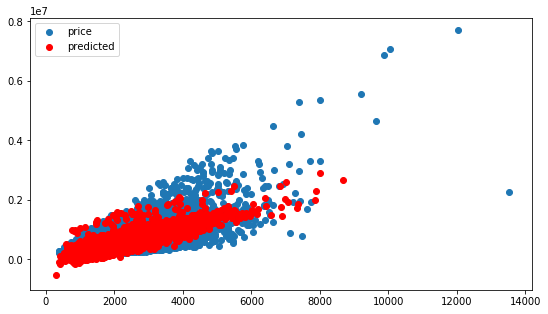

In [11]:
plt.figure(figsize=(9,5))
plt.scatter(x=X_train.sqft_living, y=y_train)
plt.scatter(X_test.sqft_living, predicted_values, color='red', label='predicted')
plt.legend()

### Actual vs Predicted - to check it looks similar to straight line

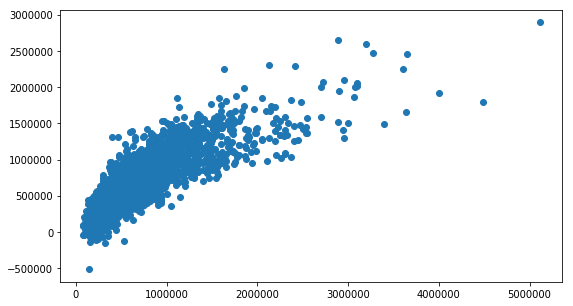

In [12]:
plt.figure(figsize=(9,5))
plt.scatter(x=y_test, y=predicted_values)

# P value :
- A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis,
- so you reject the null hypothesis. 
- A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

In [13]:
import statsmodels.api as sm
from scipy import stats

### Features with higher p values (pvalue > 0.5) can be ignored 
- for example feature like id , floors, sqft_lot have higher p values hence it can be ignored

In [14]:

X2 = sm.add_constant(X_test)
est = sm.OLS(y_test, X2)
est2 = est.fit()
est2.summary()
est2.pvalues.sort_values()

lat             0.000
sqft_living     0.000
grade           0.000
yr_built        0.000
waterfront      0.000
sqft_above      0.000
view            0.000
bedrooms        0.000
zipcode         0.000
bathrooms       0.000
sqft_basement   0.000
long            0.000
condition       0.000
sqft_lot15      0.000
sqft_living15   0.000
id              0.002
yr_renovated    0.022
floors          0.031
sqft_lot        0.044
const           0.052
dtype: float64

### Checking Correlation of features with target value 

In [15]:
corr_matrix = Data.corr()
corr_matrix['price'].sort_values()

zipcode         -0.053
id              -0.017
long             0.022
condition        0.036
yr_built         0.054
sqft_lot15       0.082
sqft_lot         0.090
yr_renovated     0.126
floors           0.257
waterfront       0.266
lat              0.307
bedrooms         0.308
sqft_basement    0.324
view             0.397
bathrooms        0.525
sqft_living15    0.585
sqft_above       0.606
grade            0.667
sqft_living      0.702
price            1.000
Name: price, dtype: float64

### Visualizing the Feature with higher p value

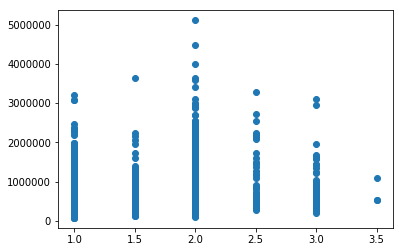

In [16]:
plt.scatter(x=X_test.floors, y=y_test)


# Removing Features with higher p values > 0.5 
- yr_renovated, sqft_lot15, floors, sqft_lot, sqft_living15, id

In [17]:
(est2.pvalues > 0.05).sort_values()

condition        False
long             False
lat              False
zipcode          False
yr_renovated     False
yr_built         False
sqft_basement    False
sqft_above       False
grade            False
sqft_lot15       False
view             False
waterfront       False
floors           False
sqft_lot         False
sqft_living      False
bathrooms        False
bedrooms         False
id               False
sqft_living15    False
const             True
dtype: bool

In [18]:
X_test.drop(columns=['floors', 'sqft_lot', 'id', 'sqft_living15'] , inplace=True)
X_train.drop(columns=['floors', 'sqft_lot', 'id', 'sqft_living15'] , inplace=True)

c:\users\nandpara\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\nandpara\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Verifying shape of X and y after dropping features with high p_value

In [19]:
print(X_train.shape)
print(y_train.shape)

(15129, 15)
(15129,)


### Fitting Linear Regression after dropping higher p_value features

In [20]:
linear = LinearRegression(fit_intercept=True , normalize=True)
linear.fit(X=X_train, y=y_train)
R_Squared_Value_after_drop = linear.score(X_test, y_test)
print("R_Squared_value : {}".format(R_Squared_Value_after_drop))

print("R_square diff after dropping higher p_value features : {}".format(R_Squared_Value_after_drop -  R_Squared_Value ))

R_Squared_value : 0.7053498706251635
R_square diff after dropping higher p_value features : -0.0009918447204391168


# Polynomial Features - Degree 2 
- Since the linear Regression is not fitting the Model very well , lets check with Polynomial Features

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

print(X_train_poly.shape)

(15129, 136)


### Fitting Linear Regression with Polynomial Features 

In [28]:
linear = LinearRegression(fit_intercept=True , normalize=True)
linear.fit(X=X_train_poly, y=y_train)
linear.score(X_test_poly, y_test)

0.7908042616987685

### Visualizing the Polynomial Fit degree 2

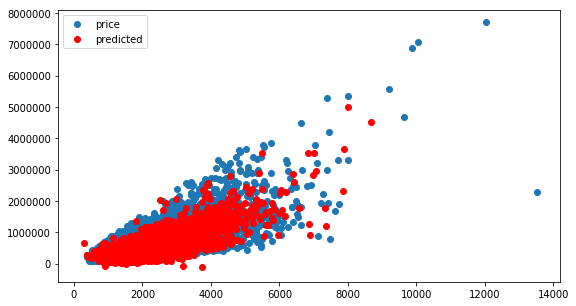

In [23]:
predicted_values = linear.predict(X_test_poly)
plt.figure(figsize=(9,5))
plt.scatter(x=X_train.sqft_living, y=y_train)
plt.scatter(X_test.sqft_living, predicted_values, color='red', label='predicted')
plt.legend()

# Polynomial Features Degress 3

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

linear = LinearRegression(fit_intercept=True , normalize=True)
linear.fit(X=X_train_poly, y=y_train)
linear.score(X_test_poly, y_test)



0.5305516719720442

### Visualizing the Polynomial Fit degree 3 

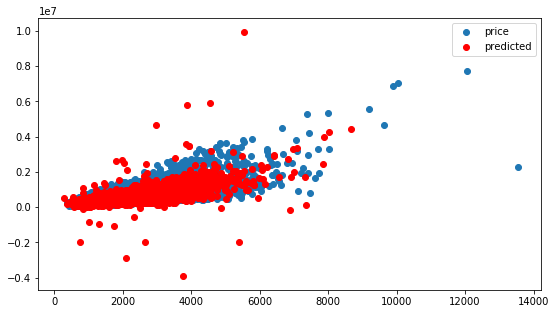

In [25]:
predicted_values = linear.predict(X_test_poly)
plt.figure(figsize=(9,5))### Visualizing the Polynomial Fit 
plt.scatter(x=X_train.sqft_living, y=y_train)
plt.scatter(X_test.sqft_living, predicted_values, color='red', label='predicted')
plt.legend()

# Linear Regression Discussion 
- Fit method uses SVD method for find the best modal parameters
- Normal equation is not used here 
- Gradient Descent is use with SGDRegressor 
- [Explained](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch04.html)

# PolynomialFeatures Discussion
- PolynomialFeatures create a matrix of X
- u should new X for training and testing against y_old  

In [30]:
from sklearn.linear_model.L

SyntaxError: invalid syntax (<ipython-input-30-f6e281a176c8>, line 1)